#  Exploring the relative significance of various health factors in determining the presence of Heart Disease

## Introduction

The term "Heart Disease" refers to different types of heart conditions, with the most common being Coronary Artery Disease (CAD), which limits bloodflow to the heart and can cause heart attacks.  High blood pressure and high blood cholesterol levels are primary risk factors for heart disease (Centers for Disease Control and Prevention, 2023). Blood pressure, when too high, can put stress on the arteries in addition to organs such as the heart and kidneys. Cholesterol is a waxy, fat-like substance that can build up on the walls of the arteries and reduce blood flow to the heart. Resting heart rate is also a general measure of heart health, with lower heart rates indicating more efficient heart function. These variables (Blood Pressure, Cholesterol, and Resting Heart Rate) can be accounted for and managed with the help of medications or lifestyle changes. Since these factors can be controlled, they are likely the most important in studying as predictors of heart disease. 

We will be trying to find which of these variables has the greatest correlation to the presence of heart disease. This will allow us to determine which factor is most important for someone to reduce their risk for heart disease, leading us to our central question: Which of those manageable predictors of Heart Disease is most important in reducing the risk of Heart Disease?

To do this we are using the Heart Disease Dataset which contains databases for four locations: Cleveland, Hungary, Switzerland, and the VA Long Beach. For our project we will be using the Cleveland database. Each database contains variables such as sex, age, cholesterol, blood pressure, fasting blood sugar, maximum heart rate, chest pain, and more. The dataset was created as part of comparative study testing the reliability of a new discriminant function in estimating the probability of Cornonary Disease.


## Preliminary Exploratory Data Analysis

We began by reading our data in from the web, which we then cleaned and wrangled for clarity and ease of manipulation.

In [1]:
#Load in libaries
library(tidyverse)
library(tidymodels)
library(dplyr)
library(repr)
library(GGally)
library(ISLR)

#Set URL of dataset
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

#Set file path of dataset
file_path <- "processed.cleveland.data"

#Get character vector of Column Names of Dataset
column_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                  "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target")

#Download dataset into R
download.file(url, destfile = file_path, method = "auto")

#Read dataset into heart_csv
heart_csv <- read_delim("processed.cleveland.data", delim = ",", col_names = column_names)

#Clean dataset
heart_data <- heart_csv |>
    select(age, sex, chol, trestbps, target) |>
    mutate(target = as_factor(ifelse(target > 0, "have heart disease", "no heart disease"))) |>
    mutate(sex = (ifelse(sex == 0, "female", "male")))
heart_data

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

age,sex,chol,trestbps,target
<dbl>,<chr>,<dbl>,<dbl>,<fct>
63,male,233,145,no heart disease
67,male,286,160,have heart disease
67,male,229,120,have heart disease
37,male,250,130,no heart disease
41,female,204,130,no heart disease
56,male,236,120,no heart disease
62,female,268,140,have heart disease
57,female,354,120,no heart disease
63,male,254,130,have heart disease


### Training and Testing Data

In [2]:
#Set seed and Create training and testing split for dataset
set.seed(1234)
heart_split <- initial_split(heart_data, prop = 0.75, strata = target)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

### Summary of Data
We are hoping to determine the most relevant causes of heart disease that a patient can manage with medication or lifestyle changes. So we will find the mean values of the variables we plan to use, and separate them by the presence of heart disease. From this we hope to see if there is any obvioius, initial corelation between heart disease and each of our variables.
We will summarize the mean cholesterol and resting blood pressure (on admission to the hospital). 

In [31]:
#Create summary dataset 
summary_heart <- heart_train |>
    group_by(target) |>
    summarize(mean_chol = mean(chol, na.rm = TRUE), mean_trestbps = mean(trestbps, na.rm = TRUE))
summary_heart

target,mean_chol,mean_trestbps
<fct>,<dbl>,<dbl>
no heart disease,245.5882,130.4286
have heart disease,247.2941,136.1961


Table 1. Mean values of cholesterol and blood pressure separated by disease status are different. This does not show an actual correlation, but rather suggests that there may be differences between the variables and their roles as predictors of disease. 

### Training Data Visualizations
Now we will see if age is a significant factor in whether a patient has heart disease. Since a patient cannot control their age, we will use this visualization to decide if we need to include a cut-off point for our data.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


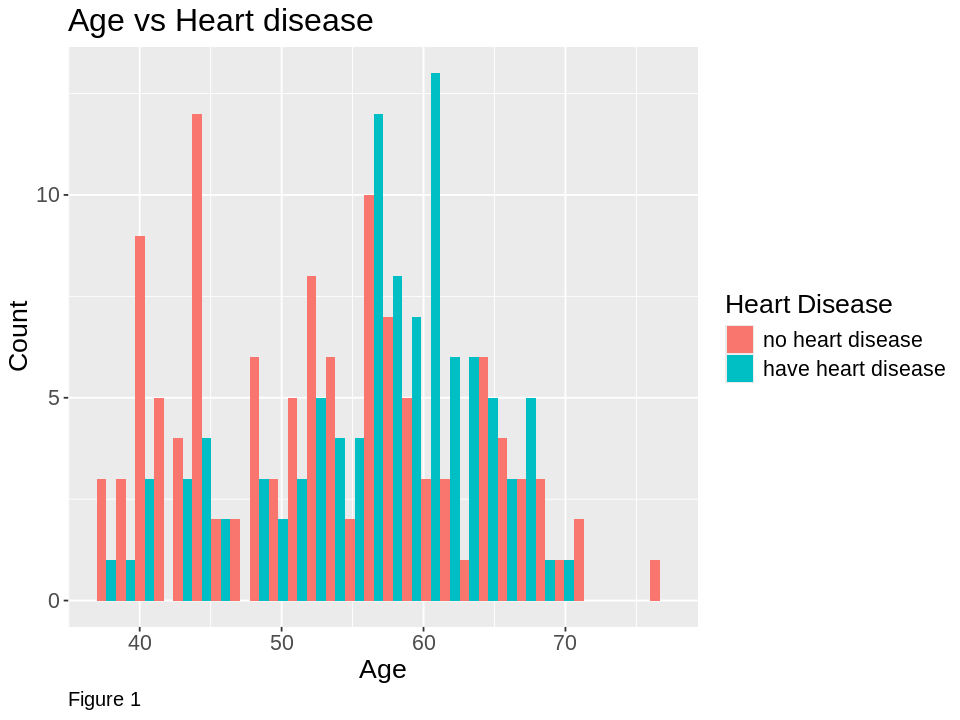

In [34]:
age_histogram <-   ggplot(heart_train, aes(x = age, fill = target)) +
                     geom_histogram(position = 'dodge') +
                     labs(x = "Age", y = "Count", fill = "Heart Disease", caption="Figure 1") +
                     ggtitle("Age vs Heart disease") +
                     theme(text=element_text(size=16), plot.caption = element_text(hjust = 0, size=12))
age_histogram

Figure 1 shows that, within our data, there were no cases of heart disease before the age of 35. Therefore, we will only work with data in which the age is over 35. We will filter our data, and then create new training and testing data with the same seed.

In [5]:
set.seed(1234)
heart_data <- heart_data |> filter(age > 35)
heart_split <- initial_split(heart_data, prop = 0.75, strata = target)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

We will also plot some prelimanary graphs to get a better understanding of our data and the relationships between variables.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


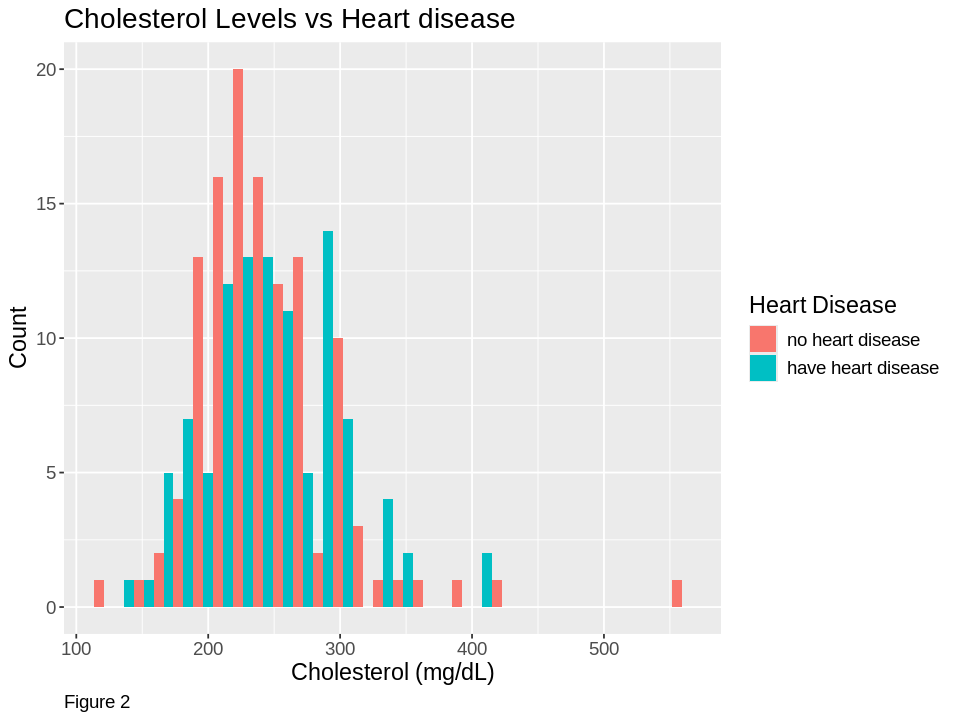

In [37]:
options(repr.plot.height=6, repr.plot.width=8)
chol_histogram <-   ggplot(heart_train, aes(x = chol, fill = target)) +
                     geom_histogram(position = 'dodge') +
                     labs(x = "Cholesterol (mg/dL)", y = "Count", fill = "Heart Disease", caption="Figure 2") +
                     ggtitle("Cholesterol Levels vs Heart disease") +
                     theme(text=element_text(size=14), plot.caption = element_text(hjust = 0))
chol_histogram

Figure 2 demonstrates that many patients with cholesterol levels in the range of about 150 to 400 have heart disease. Particularly, patients with cholesterol levels from 200 to 300 have a much larger number of positive diagnoses of Heart Disease. However, we can also see that many patients with similar cholesterol levels did NOT have heart disease, indicating that cholesterol levels themselves may not be an accurate predictor for both Men and Women.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


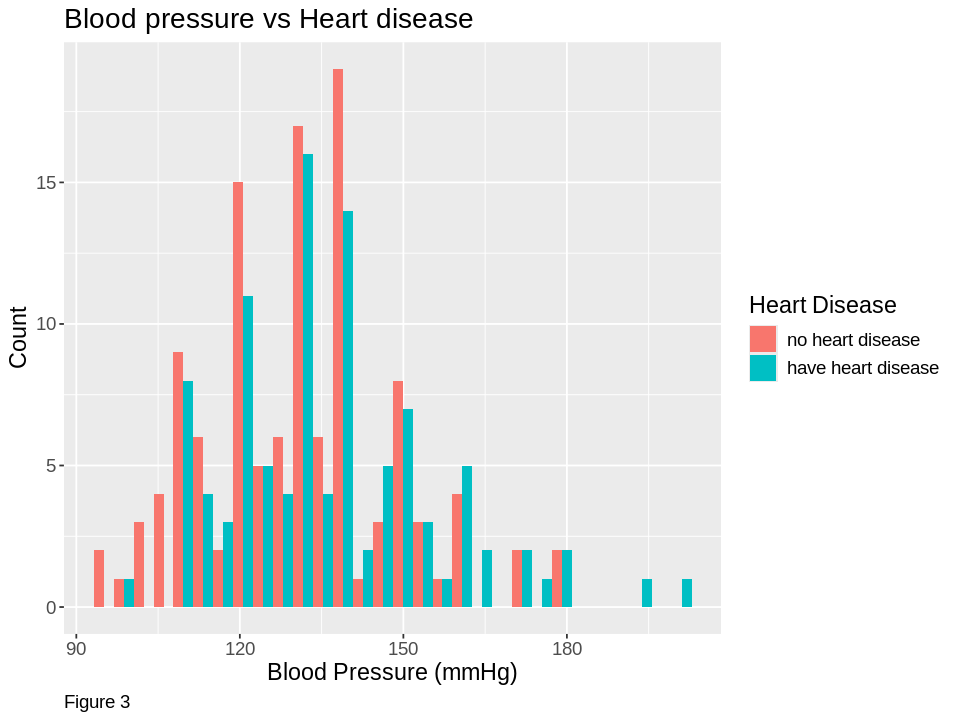

In [38]:
options(repr.plot.height=6, repr.plot.width=8)
trestbps_histogram <-   ggplot(heart_train, aes(x = trestbps, fill = target)) +
                        geom_histogram(position = 'dodge') +
                        labs(x = "Blood Pressure (mmHg)", y = "Count", fill = "Heart Disease", caption="Figure 3") +
                        ggtitle("Blood pressure vs Heart disease") +
                        theme(text=element_text(size=14), plot.caption = element_text(hjust = 0))
trestbps_histogram


Figure 3 shows that patients with resting blood pressures in the range of about 110 to 180 have a higher chance of having heart disease. However, similarly to cholesterol, it's clear that many patients with similar resting blood pressure levels as those WITH heart disease did not have a heart disease diagnosis. This suggests that resting blood pressure by itself is not an accurate predictor of Heart Disease for both Men and Women. 


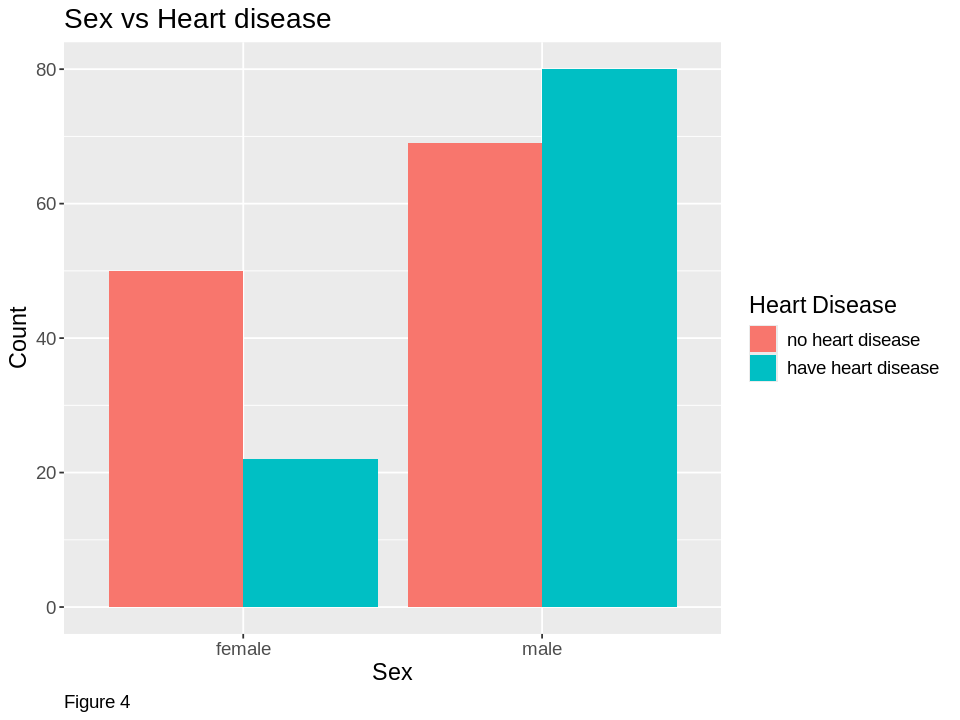

In [39]:
options(repr.plot.height=6, repr.plot.width=8)
sex_bar <-   ggplot(heart_train, aes(x = sex, fill = target)) +
                geom_bar(position = 'dodge') +
                labs(x = "Sex", y = "Count", fill = "Heart Disease", caption="Figure 4") +
                ggtitle("Sex vs Heart disease") +
                theme(text=element_text(size=14), plot.caption = element_text(hjust = 0))
sex_bar

Finally, Figure 4 shows that on average, males have a significantly higher possibility of having heart disease than females. From this, it is clear that there is some significant difference between males and females' susceptability to heart disease. Therefore, for our analysis, we will separate the data by Males and Females and compare the individual relationships of each variable for each sex. This will allow us to gain a better understanding of how Cholesterol and Resting Blood Pressure impact the diagnosis of Heart Disease in each sex respectively.


## Methods

### Variables Used
We have made the data set smaller and more manageable by using only the cholesterol, resting heart rate, blood pressure, age, and sex variables. We will also keep the column that determines whether or not the patient received a diagnosis of heart disease in order to train and then test our model. 
### Data Analysis
After cleaning the data and retaining columns for each of our variables, we split the dataset by sex. We will perform a classification using each variable for one sex and compare the accuracies of each model for that sex. We are splitting by sex because there is a significant difference between male and female levels of heart disease, as seen from our initial visualiztions. Each classification will start with a training dataset that will be used to create a recipe. We will perform 5-fold and 10-fold cross-validation on the training set to find the best to use. We will also tune in order to find the best k value. Then, we'll build a model using that k value and the training dataset. Finally, we'll use that model to pass the testing dataset through and evaluate its' accuracy. This process will be repeated for each variable for males and then each variable for females.
### Data Visualization
We will visualize results with bar plots that represent the accuracy of each variable, separated by sex. This will demonstrate which variables are best at predicting a diagnosis of heart disease and highlight any discrepancies between sexes. We will also have tibbles with each variables' accuracy for each sex. 

In [7]:
#creating training and testing sets that are separated by sex
heart_train_m <- heart_train |> filter (sex == "male")
heart_test_m <- heart_test |> filter (sex == "male")
heart_train_f <- heart_train |> filter (sex == "female")
heart_test_f <-heart_test |> filter (sex == "female")

In [8]:
#Recipe for male cholesterol data
mchol_recipe <- recipe(target ~ chol, data = heart_train_m) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

#Standard 5,10 vfolds on male data
m_vfold5 <- vfold_cv(heart_train_m, v = 5, strata = target)
m_vfold10 <- vfold_cv(heart_train_m, v = 10, strata = target)

#Standard knn_spec without tuning
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

#Finding standard error for different vfolds for male cholesterol data
knn_mchol_metrics5 <- workflow() |>
    add_recipe(mchol_recipe) |>
    add_model(knn_spec) |>
    fit_resamples(resamples = m_vfold5) |>
    collect_metrics() 
knn_mchol_metrics10 <- workflow() |>
    add_recipe(mchol_recipe) |>
    add_model(knn_spec) |>
    fit_resamples(resamples = m_vfold10) |>
    collect_metrics() 
#knn_mchol_metrics5
#knn_mchol_metrics10
#We see that standard error is least when vfold is 5, so we continue with 5

#Standard tuned knn_spec function
knn_spec_tuned <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

#Standard kvals for tuning
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 2))

knn_mchol_accuracies <- workflow() |>
    add_recipe(mchol_recipe) |>
    add_model(knn_spec_tuned) |>
    tune_grid(resamples = m_vfold5, grid = k_vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

best_k_mchol <- knn_mchol_accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
#best_k_mchol

#final knn_Spec for m_chol
knn_spec_tuned <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_mchol) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit_mchol <- workflow() |>
  add_recipe(mchol_recipe) |>
  add_model(knn_spec_tuned) |> 
  fit(data = heart_train_m)

mchol_test_predictions <- predict(knn_fit_mchol, heart_test_m) |>
  bind_cols(heart_test_m) |>
  metrics(truth = target, estimate = .pred_class) |>
  filter(.metric == "accuracy")
mchol_test_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5


In [9]:
#Recipe for male blood pressure data
mbps_recipe <- recipe(target ~ trestbps, data = heart_train_m) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

#Standard 5,10 vfolds on male data
m_vfold5 <- vfold_cv(heart_train_m, v = 5, strata = target)
m_vfold10 <- vfold_cv(heart_train_m, v = 10, strata = target)

#Standard knn_spec without tuning
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

#Finding standard error for different vfolds for male blood pressure data
knn_mbps_metrics5 <- workflow() |>
    add_recipe(mbps_recipe) |>
    add_model(knn_spec) |>
    fit_resamples(resamples = m_vfold5) |>
    collect_metrics() 
knn_mbps_metrics10 <- workflow() |>
    add_recipe(mbps_recipe) |>
    add_model(knn_spec) |>
    fit_resamples(resamples = m_vfold10) |>
    collect_metrics()
#knn_mbps_metrics5
#knn_mbps_metrics10
#We see that standard error is least when vfold is 10, so we continue with 10

#Standard tuned knn_spec function
knn_spec_tuned <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

#Standard kvals for tuning
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 2))

knn_mbps_accuracies <- workflow() |>
    add_recipe(mbps_recipe) |>
    add_model(knn_spec_tuned) |>
    tune_grid(resamples = m_vfold10, grid = k_vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

best_k_mbps <- knn_mbps_accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
#best_k_mbps

#final knn_spec for m_bps
knn_spec_tuned <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_mbps) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit_mbps <- workflow() |>
  add_recipe(mbps_recipe) |>
  add_model(knn_spec_tuned) |>
  fit(data = heart_train_m)

mbps_test_predictions <- predict(knn_fit_mbps, heart_test_m) |>
  bind_cols(heart_test_m) |>
  metrics(truth = target, estimate = .pred_class) |>
  filter(.metric == "accuracy")
mbps_test_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5961538


In [10]:
#Recipe for female cholesterol data
fchol_recipe <- recipe(target ~ chol, data = heart_train_f) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

#Standard 5,10 vfolds on female data
f_vfold5 <- vfold_cv(heart_train_f, v = 5, strata = target)
f_vfold10 <- vfold_cv(heart_train_f, v = 10, strata = target)

#Standard knn_spec without tuning
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

#Finding standard error for different vfolds for female cholesterol data
knn_fchol_metrics5 <- workflow() |>
    add_recipe(fchol_recipe) |>
    add_model(knn_spec) |>
    fit_resamples(resamples = f_vfold5) |>
    collect_metrics() 
knn_fchol_metrics10 <- workflow() |>
    add_recipe(fchol_recipe) |>
    add_model(knn_spec) |>
    fit_resamples(resamples = f_vfold10) |>
    collect_metrics()
#knn_fchol_metrics5
#knn_fchol_metrics10
#We see that standard error is least when vfold is 5, so we continue with 5

#Standard tuned knn_spec function
knn_spec_tuned <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

#Standard kvals for tuning
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 2))

knn_fchol_accuracies <- workflow() |>
    add_recipe(fchol_recipe) |>
    add_model(knn_spec_tuned) |>
    tune_grid(resamples = f_vfold5, grid = k_vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

best_k_fchol <- knn_fchol_accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
#best_k_fchol

#final knn_spec for m_bps
knn_spec_tuned <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_fchol) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit_fchol <- workflow() |>
  add_recipe(fchol_recipe) |>
  add_model(knn_spec_tuned) |>
  fit(data = heart_train_f)

fchol_test_predictions <- predict(knn_fit_fchol, heart_test_f) |>
  bind_cols(heart_test_f) |>
  metrics(truth = target, estimate = .pred_class) |>
  filter(.metric == "accuracy")
fchol_test_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8695652


In [11]:
#Recipe for female blood pressure data
fbps_recipe <- recipe(target ~ trestbps, data = heart_train_f) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

#Standard 5,10 vfolds on female data
f_vfold5 <- vfold_cv(heart_train_f, v = 5, strata = target)
f_vfold10 <- vfold_cv(heart_train_f, v = 10, strata = target)

#Standard knn_spec without tuning
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

#Finding standard error for different vfolds for female blood pressure data
knn_fbps_metrics5 <- workflow() |>
    add_recipe(fbps_recipe) |>
    add_model(knn_spec) |>
    fit_resamples(resamples = f_vfold5) |>
    collect_metrics() 
knn_fbps_metrics10 <- workflow() |>
    add_recipe(fbps_recipe) |>
    add_model(knn_spec) |>
    fit_resamples(resamples = f_vfold10) |>
    collect_metrics()
#knn_fbps_metrics5
#knn_fbps_metrics10
#We see that standard error is least when vfold is 5, so we continue with 5

#Standard tuned knn_spec function
knn_spec_tuned <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

#Standard kvals for tuning
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 2))

knn_fbps_accuracies <- workflow() |>
    add_recipe(fbps_recipe) |>
    add_model(knn_spec_tuned) |>
    tune_grid(resamples = f_vfold5, grid = k_vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

best_k_fbps <- knn_fbps_accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
#best_k_fbps

#final knn_spec for m_bps
knn_spec_tuned <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_fbps) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit_fbps <- workflow() |>
  add_recipe(fbps_recipe) |>
  add_model(knn_spec_tuned) |>
  fit(data = heart_train_f)

fbps_test_predictions <- predict(knn_fit_fbps, heart_test_f) |>
  bind_cols(heart_test_f) |>
  metrics(truth = target, estimate = .pred_class) |>
  filter(.metric == "accuracy")
fbps_test_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.826087


## Visualizations of Analysis

Joining with `by = join_by(.metric, .estimator, .estimate)`


.metric,.estimator,.estimate,data_type
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,50.00000,m_chol
accuracy,binary,59.61538,m_bps


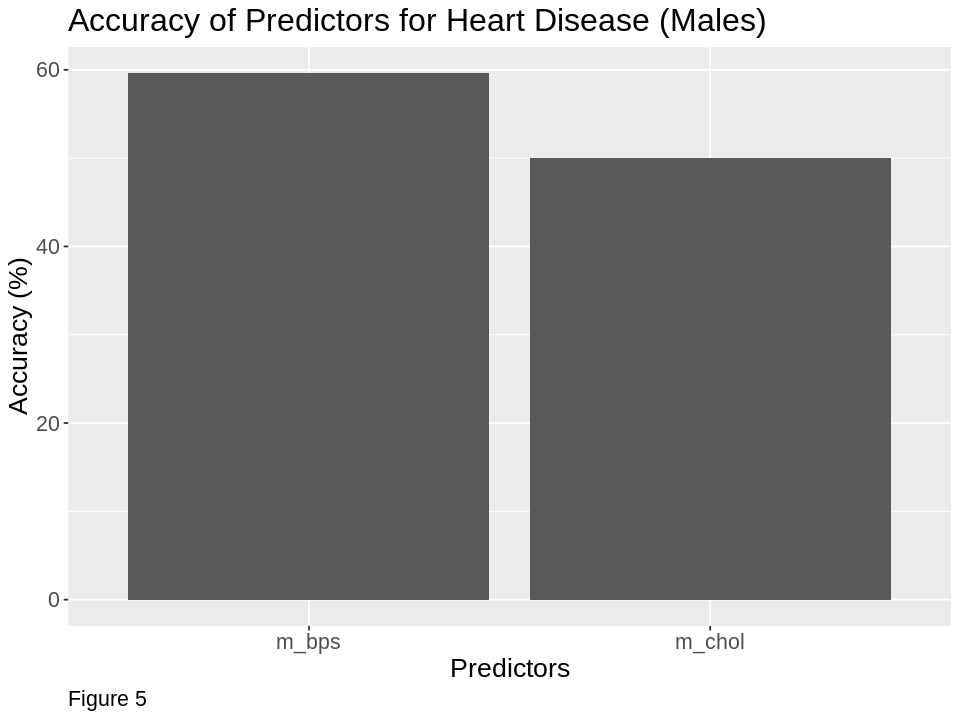

In [24]:
male_accuracies <- full_join(mchol_test_predictions, mbps_test_predictions) |>
    mutate(.estimate=.estimate*100)
male_accuracies$data_type <- c("m_chol", "m_bps")
male_accuracies
options(repr.plot.width=8, repr.plot.height=6)
male_accuracy_plot <- male_accuracies |>
    ggplot(aes(x=data_type, y=.estimate))+
    geom_bar(stat="identity") +
    labs(x = "Predictors", y = "Accuracy (%)", caption="Figure 5") +
    theme(text=element_text(size=16), plot.caption = element_text(hjust = 0)) +
    ggtitle("Accuracy of Predictors for Heart Disease (Males)")
male_accuracy_plot

Figure 5 demonstrates that blood pressure is a slightly better predictor of heart disease thna cholesterol for males. However, neither variable is an especially accurate predictor, with cholesterol being wholly ineffective with an accuracy of 50%.

Joining with `by = join_by(.metric, .estimator, .estimate)`


.metric,.estimator,.estimate,data_type
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,86.95652,f_chol
accuracy,binary,82.60870,f_bps


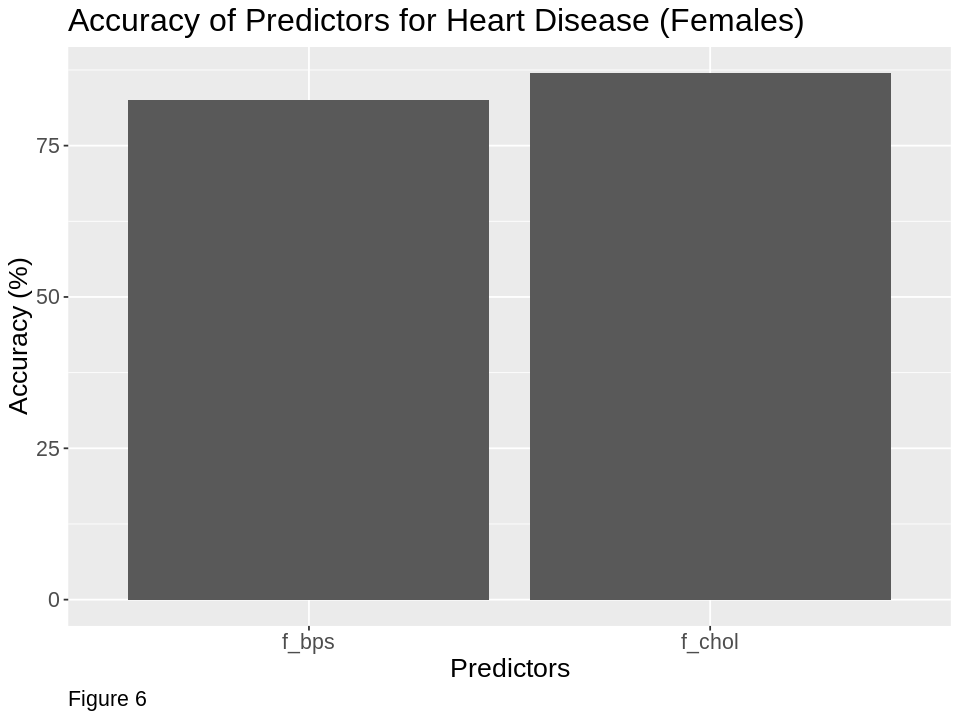

In [25]:
female_accuracies <- full_join(fchol_test_predictions, fbps_test_predictions) |>
    mutate(.estimate=.estimate*100)
female_accuracies$data_type <- c("f_chol", "f_bps")
female_accuracies
options(repr.plot.width=8, repr.plot.height=6)
female_accuracy_plot <- female_accuracies |>
    ggplot(aes(x=data_type, y=.estimate))+
    geom_bar(stat="identity") +
    xlab("Predictors") +
    ylab("Accuracy (%)")+
    labs(caption="Figure 6")+
    theme(text=element_text(size=16), plot.caption = element_text(hjust = 0)) +
    ggtitle("Accuracy of Predictors for Heart Disease (Females)")
female_accuracy_plot

Figure 6 demonstrates that for females, cholesterol is a slightly better predictor of heart disease than blood pressure. However, unlike the data found for males, both predictors are relatively good at predicting heart disease. 

$`scatter plot matrix`
NULL

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


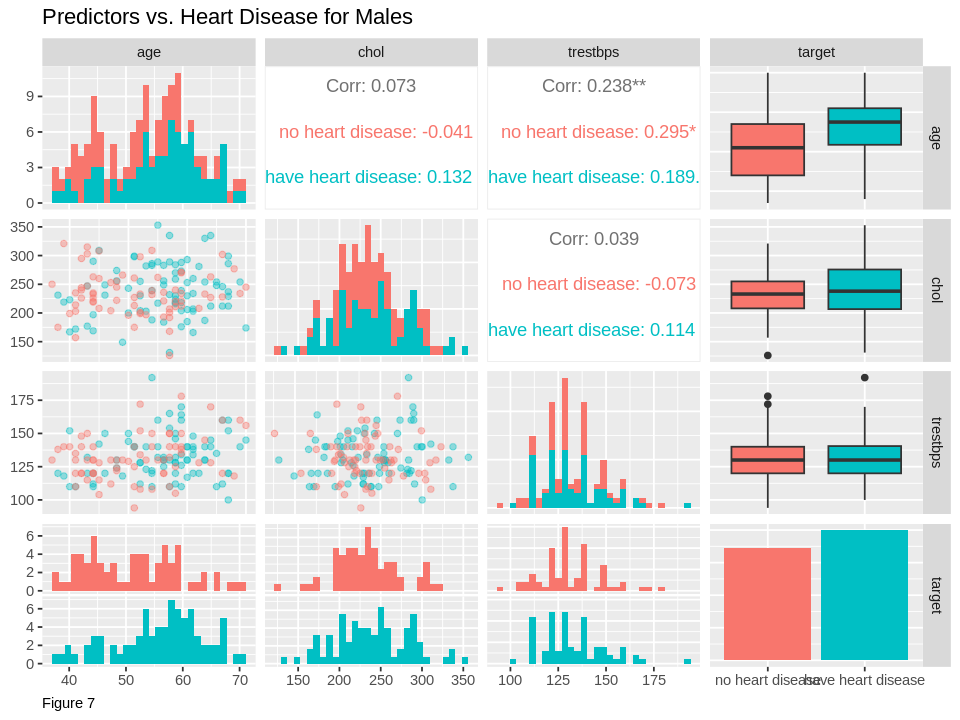

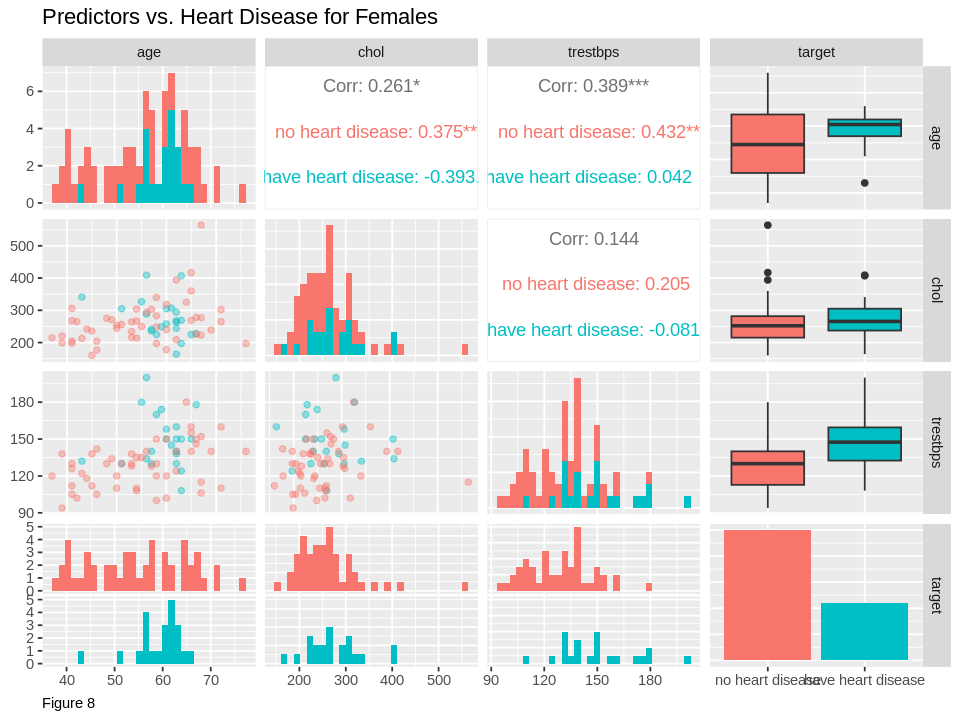

In [27]:
options("scatter plot matrix")
predictor_grid <- heart_train_m |>
                  select(-c(sex)) |>
                  ggpairs(
                         aes(color = factor(target)),
                         lower = list(continuous = wrap('points', alpha = 0.4)),
                         diag = list(continuous = "barDiag")
                          )  +
                  ggtitle("Predictors vs. Heart Disease for Males")+
                    labs(caption="Figure 7")+
                    theme(plot.caption = element_text(hjust = 0))
predictor_grid

predictor_grid_f <- heart_train_f |>
                    select(-c(sex)) |>
                    ggpairs(
                           aes(color = factor(target)),
                           lower = list(continuous = wrap('points', alpha = 0.4)),
                           diag = list(continuous = "barDiag")
                            )  +
                    ggtitle("Predictors vs. Heart Disease for Females")+
                    labs(caption="Figure 8")+
                    theme(plot.caption = element_text(hjust = 0))
predictor_grid_f

## Discussion

From our data analysis we have found that both high levels of cholesterol and high blood pressure are successful predictors of the presence of heart disease in women (Figure 6). However, cholesterol is a slightly better predictor, with an accuracy of 86% compared to 82% for blood pressure. In males, blood pressure predicts presence of heart disease better than cholesterol (Figure 5). We also determined that women have an average 85% accuracy rate using our predictors, while men have an average 55% accuracy rate. Therefore, perhaps other variables are better predictors of heart disease in men. This would require further data analysis.

We expected to find that cholesterol is the best predictor of heart disease because our prelimary data analysis suggested that there might be more of a correlation between cholesterol and heart disease compared to blood pressure and heart disease. Finding that cholesterol is not a wholly accurate predictor of heart disease in men was surprising, especially because it seemed as such in women. These results indicate that splitting the dataset by sex was effective as there are different outcomes depending on sex. Furthermore, this indicates that females and males should consider implementing different lifestyle or medication changes to focus on alterning cholesterol vs blood pressure, respectively. 

It is important to note that the sample size for females from this dataset is significantly smaller than that of the men and therefore may have impacted our analysis (Figure 4). Further analysis should be performed on other datasets to confirm our findings. Additionally, the dataset that we used here utilizes participants from Cleveland, and therefore the results may not be generalized to other populations. Repeating this same analysis on the dataset from Switzerland would be interesting to determine if the same predictors were effective. 

still need to: "all tables and figure should have a figure/table number and a legend"

need to talk about the big scatter plot matrix and what each panel means,

discussion:
summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to?

and add references

## References

Centers for Disease Control and Prevention. (2023, May 15). About heart disease. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/about.htm 

Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J. J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American journal of cardiology, 64(5), 304–310. https://doi.org/10.1016/0002-9149(89)90524-9 

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X. 

